# GRASP Beam Analysis

## Introduction

**Goal**: Study the effect of deformations and position erros in geometric parameters of BINGO optics for the Beam quality.

**Method**: We vary the position of the feed w.r.t. translation and rotations and the position of the secondary w.r.t. translations, obtaining the beam pattern with GRASP, using the notebook make_dataset.

**Analysis**: We construct a handful of metrics to analyze the quality of Beam and discuss the results.

### Geometry

![GRASP](./xzcut.png)

![GRASP](./GRASP_VIEW.png)

 - Translations and Rotation of the feed wrt to the coordinate system of the central feed. Blue axis is Z, red axis is X.
 - Translations of the secondary w.r.t. the coordinate system in the centre of the figure, where the eletric field is calculated.

### Efficiency Metrics

We calculate a number of metrics in order to describe the beam:

- Directivity (dB):
$$D_{max} = 10 \log_{10} \frac{4 \pi \Vert E^2\Vert_{max}}{\iint \Vert E^2\Vert d\Omega}$$

- Main Beam Efficiency (spillover)
$$\eta_{spill} = \frac{\iint_{\mathrm{MB}} \Vert E^2\Vert d\Omega}{\iint \Vert E^2\Vert d\Omega}$$

- Polarization Efficiency:

$$\eta_{pol} = \frac{\iint_{\mathrm{MB}} \Vert E_{CO}^2\Vert d\Omega}{\iint_{\mathrm{MB}} \Vert E^2\Vert d\Omega}$$

- Amplitude Efficency:

$$\eta_{Amp} = \frac{\left(\iint_{\mathrm{MB}} \Vert E_{CO}\Vert d\Omega\right)^2}{\Omega \iint_{\mathrm{MB}} \Vert E_{CO}^2\Vert d\Omega}$$

- Phase Efficency:

$$\eta_{phase} = \frac{\Vert\iint_{\mathrm{MB}}  E_{CO} d\Omega\Vert^2}{\left(\iint_{\mathrm{MB}} \Vert E_{CO}\Vert d\Omega\right)^2}$$

- Total gain efficency:

$$\eta = \frac{\Vert\iint_{\mathrm{MB}}  E_{CO} d\Omega\Vert^2}{\iint_{\mathrm{MB}} \Vert E\Vert^2 d\Omega}$$



## Inicialização

In [1]:
import os
import sys
import glob
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
#-----
import time
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "src")))
import grasp
#-----
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)
InteractiveShell.ast_node_interactivity = "all"

## Visualizando Resultados

### Translação do Feed

In [23]:
df_gain_x, dfs_x = grasp.load_cuts("../data/raw/grasp/job_central__feed_*_0_0_0_0/*.cut")
df_gain_y, dfs_y = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_*_0_0_0/*.cut")
df_gain_z, dfs_z = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_0_*_0_0/*.cut")

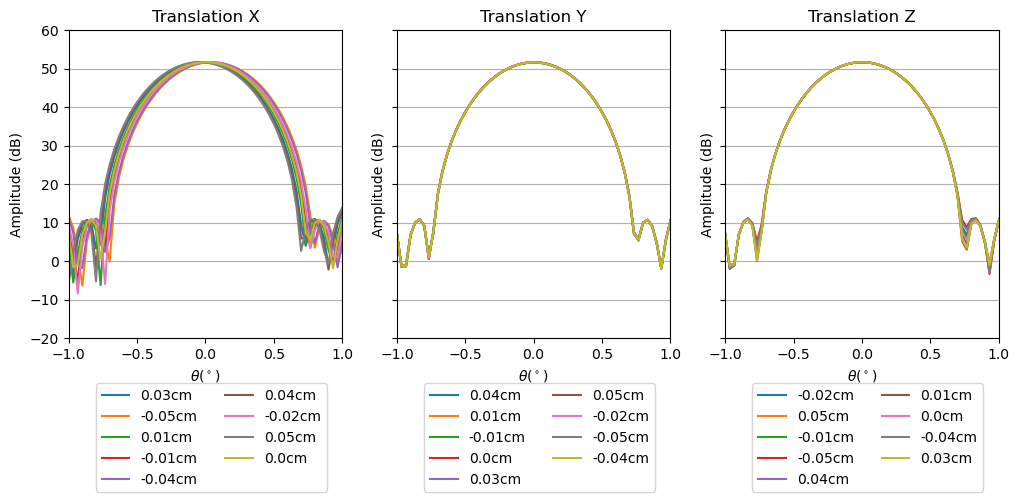

In [24]:
# Visualização da coleção de padrões de feixe.
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
for ii, df in enumerate(dfs_x):
    grasp.plot_beam_pattern(df, ax=ax[0], label=str(df_gain_x.Values[ii]) + "cm", norm=False);
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-20,60])
ax[0].set_title("Translation X")
ax[0].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_y):
    grasp.plot_beam_pattern(df, ax=ax[1], label=str(df_gain_y.Values[ii]) + "cm", norm=False);
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-20,60])
ax[1].set_title("Translation Y")
ax[1].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_z):
    grasp.plot_beam_pattern(df, ax=ax[2], label=str(df_gain_z.Values[ii]) + "cm", norm=False);
ax[2].set_xlim([-1, 1])
ax[2].set_ylim([-20,60])
ax[2].set_title("Translation Z")
ax[2].legend(ncols=2, loc=(0.1, -0.5))
plt.show();

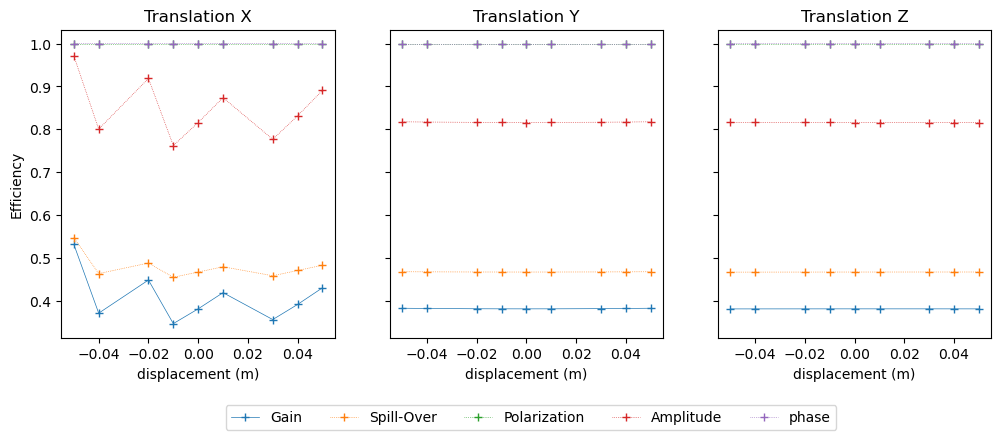

In [25]:
df_gain_x = df_gain_x.sort_values(by="Values")
df_gain_y = df_gain_y.sort_values(by="Values")
df_gain_z = df_gain_z.sort_values(by="Values")
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_x.Values, df_gain_x.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[0].plot(df_gain_x.Values, df_gain_x.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].set_title("Translation X")
ax[0].set_xlabel("displacement (m)")
ax[0].set_ylabel("Efficiency")
ax[0].legend(ncols=5, loc=(0.6, -0.3))
ax[1].plot(df_gain_y.Values, df_gain_y.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[1].plot(df_gain_y.Values, df_gain_y.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].set_title("Translation Y")
ax[1].set_xlabel("displacement (m)")
ax[2].plot(df_gain_z.Values, df_gain_z.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[2].plot(df_gain_z.Values, df_gain_z.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].plot(df_gain_z.Values, df_gain_z.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].plot(df_gain_z.Values, df_gain_z.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].plot(df_gain_z.Values, df_gain_z.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].set_title("Translation Z")
ax[2].set_xlabel("displacement (m)")
plt.show();

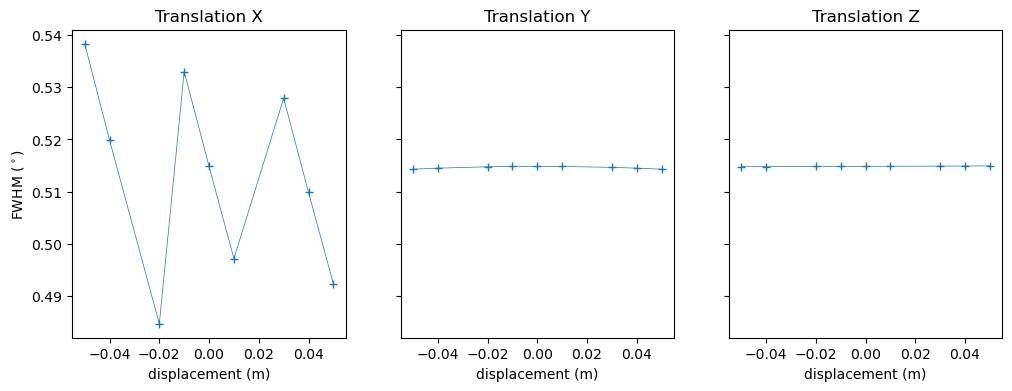

In [26]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_x.Values, df_gain_x.FWHM * 2, marker="+", linewidth=0.5)
ax[0].set_title("Translation X")
ax[0].set_xlabel("displacement (m)")
ax[0].set_ylabel(r"FWHM $(^\circ)$")
ax[1].plot(df_gain_y.Values, df_gain_y.FWHM * 2, marker="+", linewidth=0.5)
ax[1].set_title("Translation Y")
ax[1].set_xlabel("displacement (m)")
ax[2].plot(df_gain_z.Values, df_gain_z.FWHM * 2, marker="+", linewidth=0.5)
ax[2].set_title("Translation Z")
ax[2].set_xlabel("displacement (m)")
plt.show();

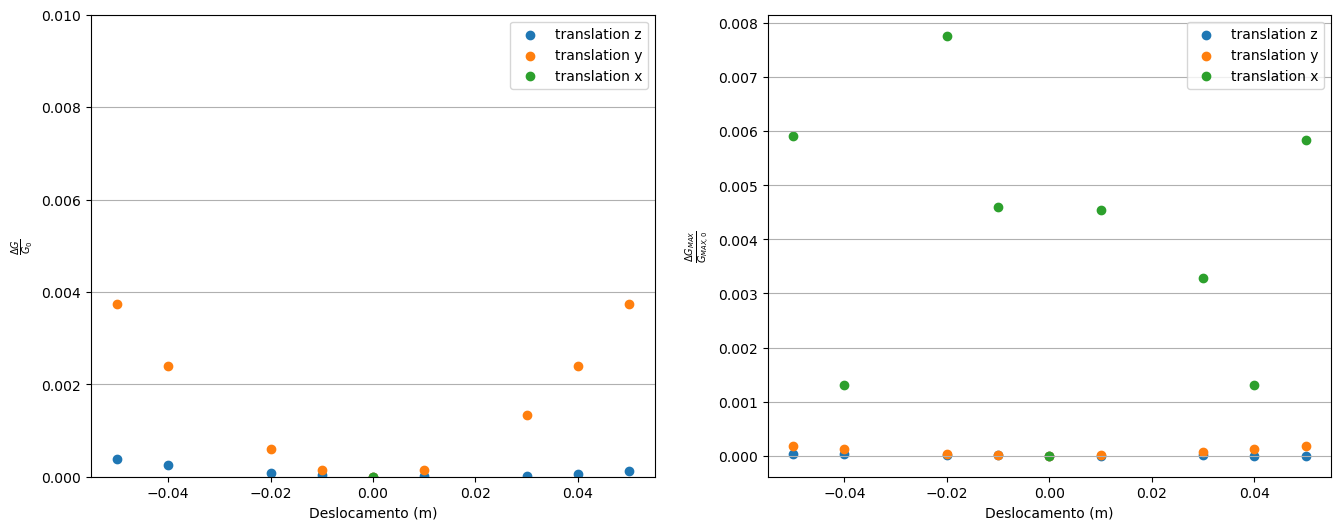

In [30]:
df_n_z = grasp.normalize(df_gain_z)
df_n_y = grasp.normalize(df_gain_y)
df_n_x = grasp.normalize(df_gain_x)
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(df_n_z.Values, df_n_z.delta_Gain, label="translation z")
ax[0].scatter(df_n_y.Values, df_n_y.delta_Gain, label="translation y")
ax[0].scatter(df_n_x.Values, df_n_x.delta_Gain, label="translation x")
ax[0].set_xlabel("Deslocamento (m)")
ax[0].set_ylabel(r"$\frac{\Delta G}{G_0}$")
ax[0].legend()
ax[0].set_ylim([0, 0.01])
ax[0].grid(axis="y")

ax[1].scatter(df_n_z.Values, df_n_z.delta_Gain_Max, label="translation z")
ax[1].scatter(df_n_y.Values, df_n_y.delta_Gain_Max, label="translation y")
ax[1].scatter(df_n_x.Values, df_n_x.delta_Gain_Max, label="translation x")
ax[1].set_xlabel("Deslocamento (m)")
ax[1].set_ylabel(r"$\frac{\Delta G_{MAX}}{G_{MAX,0}}$")
ax[1].legend()
ax[1].grid(axis="y")
#ax[1].set_ylim([0, 0.01])
plt.show();

### Rotações do Feed

In [7]:
df_gain_rot_x, dfs_rot_x = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_0_0_*_0/*.cut")
df_gain_rot_y, dfs_rot_y = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_0_0_0_*/*.cut")

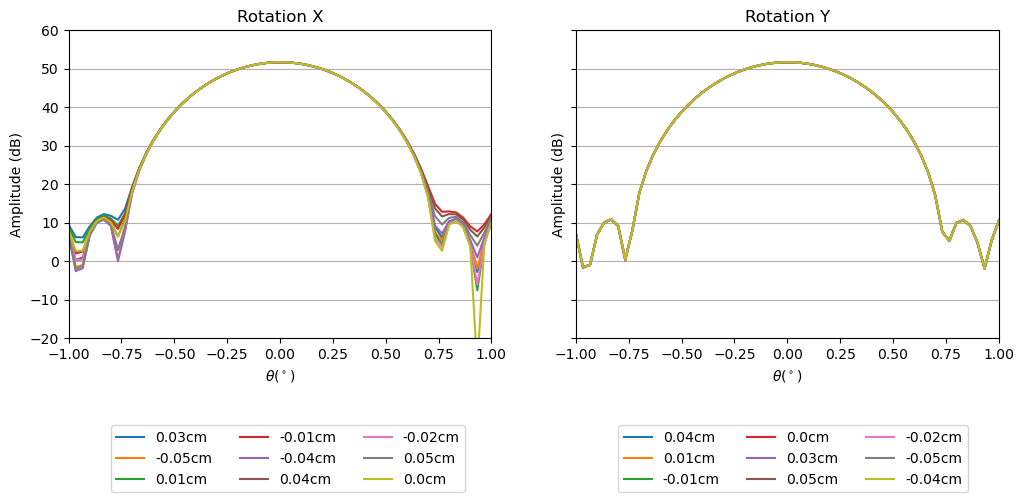

In [8]:
# Visualização da coleção de padrões de feixe.
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
for ii, df in enumerate(dfs_rot_x):
    grasp.plot_beam_pattern(df, ax=ax[0], label=str(df_gain_x.Values[ii]) + "cm", norm=False);
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-20,60])
ax[0].set_title("Rotation X")
ax[0].legend(ncols=3, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_rot_y):
    grasp.plot_beam_pattern(df, ax=ax[1], label=str(df_gain_y.Values[ii]) + "cm", norm=False);
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-20,60])
ax[1].set_title("Rotation Y")
ax[1].legend(ncols=3, loc=(0.1, -0.5))
plt.show();

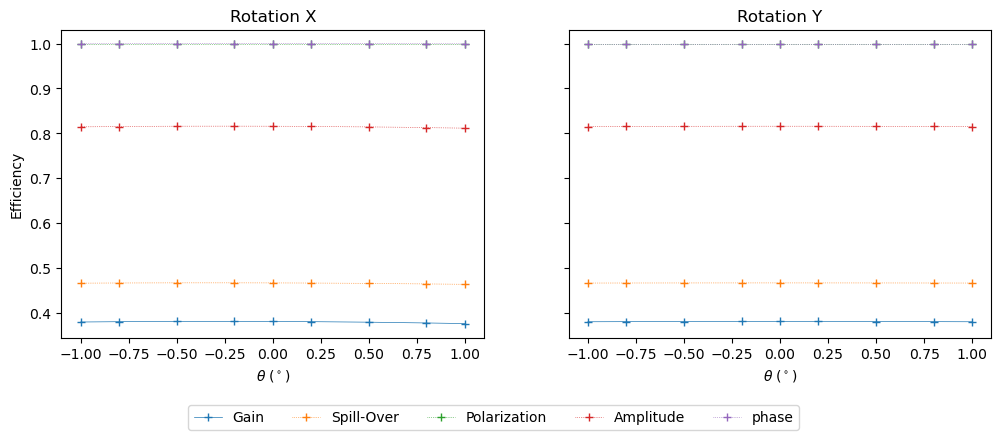

In [9]:
df_gain_x = df_gain_rot_x.sort_values(by="Values")
df_gain_y = df_gain_rot_y.sort_values(by="Values")
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_x.Values, df_gain_x.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[0].plot(df_gain_x.Values, df_gain_x.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].set_title("Rotation X")
ax[0].set_xlabel(r"$\theta\;(^\circ)$")
ax[0].set_ylabel("Efficiency")
ax[0].legend(ncols=5, loc=(0.3, -0.3))
ax[1].plot(df_gain_y.Values, df_gain_y.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[1].plot(df_gain_y.Values, df_gain_y.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].set_title("Rotation Y")
ax[1].set_xlabel(r"$\theta\;(^\circ)$")
plt.show();

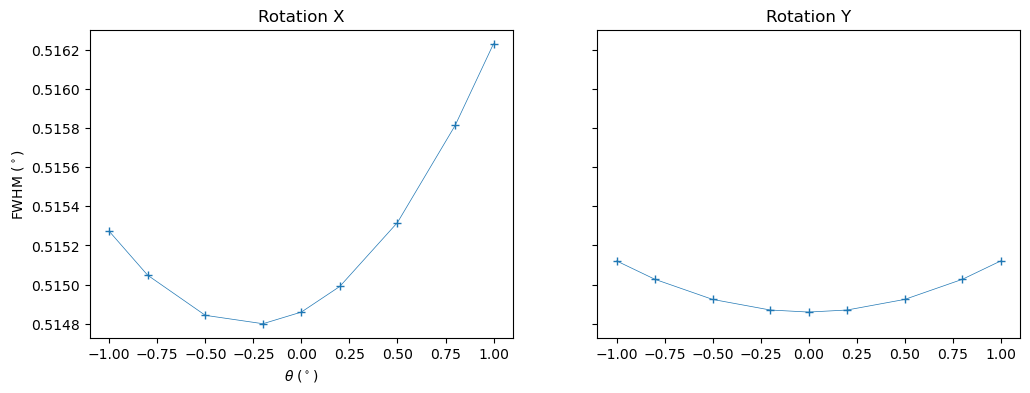

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_x.Values, df_gain_x.FWHM * 2, marker="+", linewidth=0.5)
ax[0].set_title("Rotation X")
ax[0].set_xlabel(r"$\theta\;(^\circ)$")
ax[0].set_ylabel(r"FWHM $(^\circ)$")
ax[1].plot(df_gain_y.Values, df_gain_y.FWHM * 2, marker="+", linewidth=0.5)
ax[1].set_title("Rotation Y")
ax[0].set_xlabel(r"$\theta\;(^\circ)$")
plt.show();

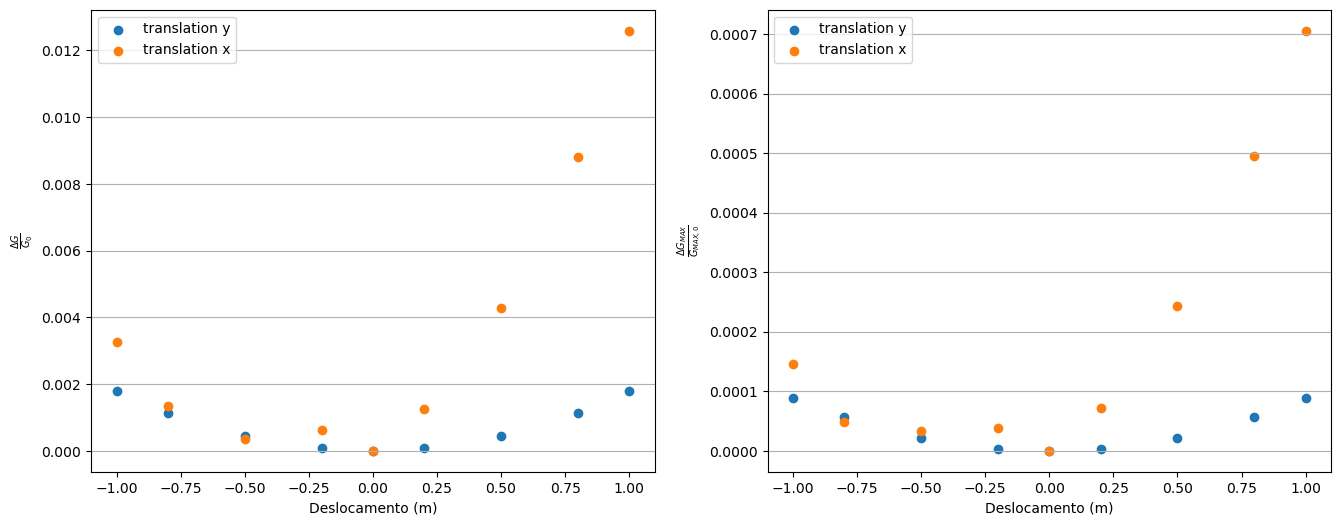

In [11]:
df_n_y = grasp.normalize(df_gain_y)
df_n_x = grasp.normalize(df_gain_x)
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(df_n_y.Values, df_n_y.delta_Gain, label="translation y")
ax[0].scatter(df_n_x.Values, df_n_x.delta_Gain, label="translation x")
ax[0].set_xlabel("Deslocamento (m)")
ax[0].set_ylabel(r"$\frac{\Delta G}{G_0}$")
ax[0].legend()
ax[0].grid(axis="y")

ax[1].scatter(df_n_y.Values, df_n_y.delta_Gain_Max, label="translation y")
ax[1].scatter(df_n_x.Values, df_n_x.delta_Gain_Max, label="translation x")
ax[1].set_xlabel("Deslocamento (m)")
ax[1].set_ylabel(r"$\frac{\Delta G_{MAX}}{G_{MAX,0}}$")
ax[1].legend()
ax[1].grid(axis="y")
plt.show();

### Translações do Secundário

In [12]:
df_gain_sec_x, dfs_sec_x = grasp.load_cuts("../data/raw/grasp/job_central__secondary_*_0_0_0_0/*.cut")
df_gain_sec_y, dfs_sec_y = grasp.load_cuts("../data/raw/grasp/job_central__secondary_0_*_0_0_0/*.cut")
df_gain_sec_z, dfs_sec_z = grasp.load_cuts("../data/raw/grasp/job_central__secondary_0_0_*_0_0/*.cut")

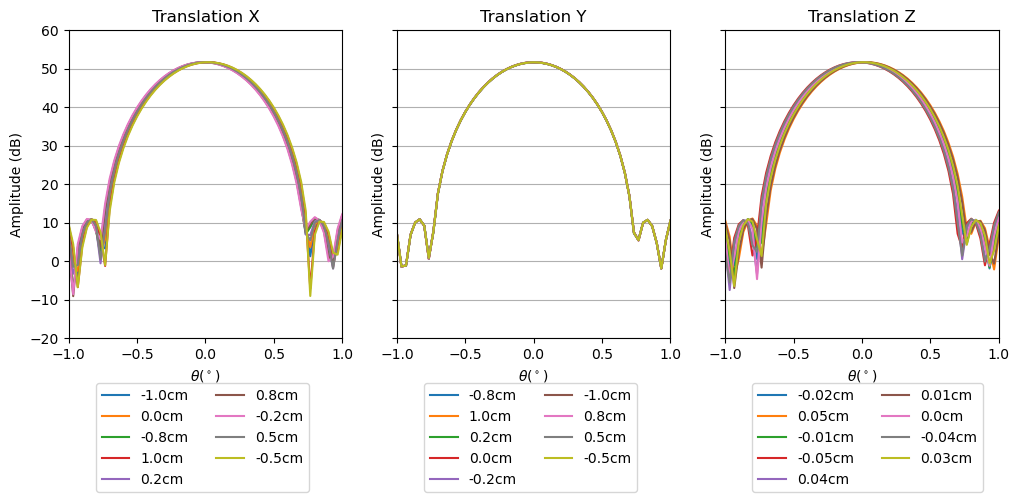

In [13]:
# Visualização da coleção de padrões de feixe.
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
for ii, df in enumerate(dfs_sec_x):
    grasp.plot_beam_pattern(df, ax=ax[0], label=str(df_gain_x.Values[ii]) + "cm", norm=False);
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-20,60])
ax[0].set_title("Translation X")
ax[0].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_sec_y):
    grasp.plot_beam_pattern(df, ax=ax[1], label=str(df_gain_y.Values[ii]) + "cm", norm=False);
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-20,60])
ax[1].set_title("Translation Y")
ax[1].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_sec_z):
    grasp.plot_beam_pattern(df, ax=ax[2], label=str(df_gain_z.Values[ii]) + "cm", norm=False);
ax[2].set_xlim([-1, 1])
ax[2].set_ylim([-20,60])
ax[2].set_title("Translation Z")
ax[2].legend(ncols=2, loc=(0.1, -0.5))
plt.show();

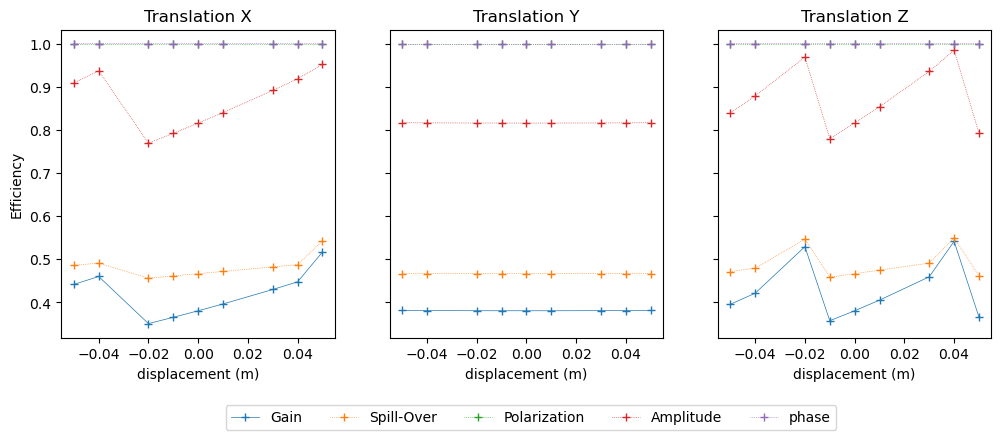

In [14]:
df_gain_x = df_gain_sec_x.sort_values(by="Values")
df_gain_y = df_gain_sec_y.sort_values(by="Values")
df_gain_z = df_gain_sec_z.sort_values(by="Values")
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_x.Values, df_gain_x.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[0].plot(df_gain_x.Values, df_gain_x.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].plot(df_gain_x.Values, df_gain_x.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[0].set_title("Translation X")
ax[0].set_xlabel("displacement (m)")
ax[0].set_ylabel("Efficiency")
ax[0].legend(ncols=5, loc=(0.6, -0.3))
ax[1].plot(df_gain_y.Values, df_gain_y.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[1].plot(df_gain_y.Values, df_gain_y.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].plot(df_gain_y.Values, df_gain_y.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[1].set_title("Translation Y")
ax[1].set_xlabel("displacement (m)")
ax[2].plot(df_gain_z.Values, df_gain_z.Gain, label = "Gain", marker="+", linewidth=0.5)
ax[2].plot(df_gain_z.Values, df_gain_z.eta_spill, label = "Spill-Over", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].plot(df_gain_z.Values, df_gain_z.eta_pol, label = "Polarization", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].plot(df_gain_z.Values, df_gain_z.eta_amp, label = "Amplitude", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].plot(df_gain_z.Values, df_gain_z.eta_phase, label = "phase", marker="+", linewidth=0.5, linestyle="dotted")
ax[2].set_title("Translation Z")
ax[2].set_xlabel("displacement (m)")
plt.show();

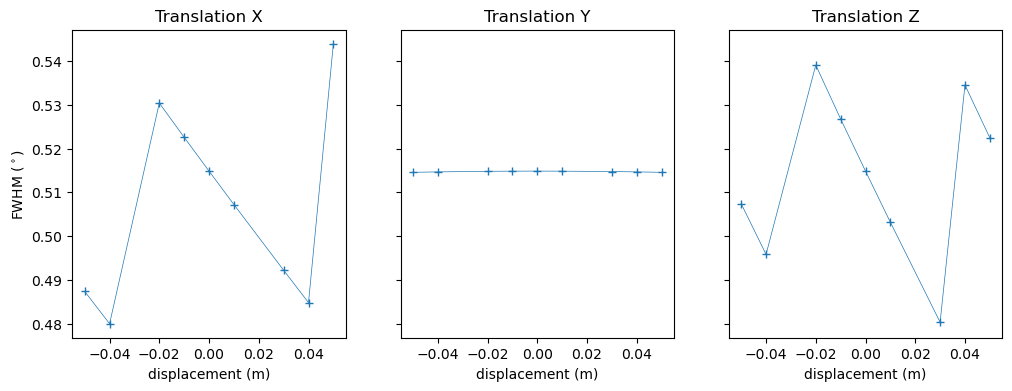

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_x.Values, df_gain_x.FWHM * 2, marker="+", linewidth=0.5)
ax[0].set_title("Translation X")
ax[0].set_xlabel("displacement (m)")
ax[0].set_ylabel(r"FWHM $(^\circ)$")
ax[1].plot(df_gain_y.Values, df_gain_y.FWHM * 2, marker="+", linewidth=0.5)
ax[1].set_title("Translation Y")
ax[1].set_xlabel("displacement (m)")
ax[2].plot(df_gain_z.Values, df_gain_z.FWHM * 2, marker="+", linewidth=0.5)
ax[2].set_title("Translation Z")
ax[2].set_xlabel("displacement (m)")
plt.show();

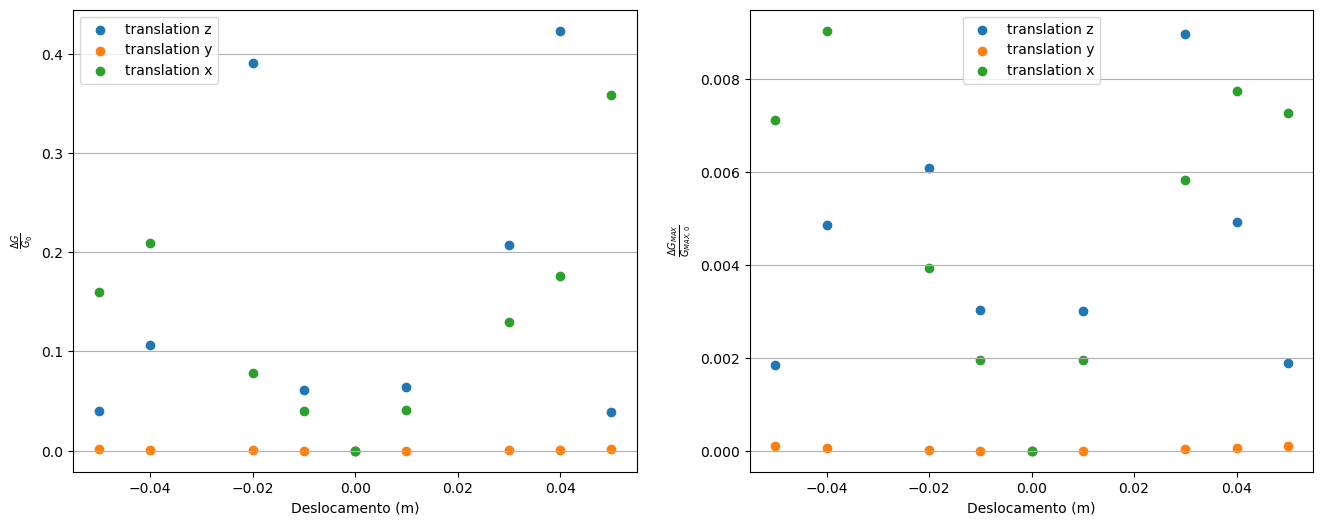

In [16]:
df_n_z = grasp.normalize(df_gain_z)
df_n_y = grasp.normalize(df_gain_y)
df_n_x = grasp.normalize(df_gain_x)
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(df_n_z.Values, df_n_z.delta_Gain, label="translation z")
ax[0].scatter(df_n_y.Values, df_n_y.delta_Gain, label="translation y")
ax[0].scatter(df_n_x.Values, df_n_x.delta_Gain, label="translation x")
ax[0].set_xlabel("Deslocamento (m)")
ax[0].set_ylabel(r"$\frac{\Delta G}{G_0}$")
ax[0].legend()
ax[0].grid(axis="y")
ax[1].scatter(df_n_z.Values, df_n_z.delta_Gain_Max, label="translation z")
ax[1].scatter(df_n_y.Values, df_n_y.delta_Gain_Max, label="translation y")
ax[1].scatter(df_n_x.Values, df_n_x.delta_Gain_Max, label="translation x")
ax[1].set_xlabel("Deslocamento (m)")
ax[1].set_ylabel(r"$\frac{\Delta G_{MAX}}{G_{MAX,0}}$")
ax[1].legend()
ax[1].grid(axis="y")
plt.show();

## Conclusões